In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Train.csv")
data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


# About Data                         
After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

In [3]:
data.shape

(40000, 2)

In [4]:
data = data.iloc[:10000,:]

In [5]:
data.shape

(10000, 2)

# Working With Label

In [6]:
data['label'].value_counts()

label
0    5043
1    4957
Name: count, dtype: int64

<Axes: xlabel='label'>

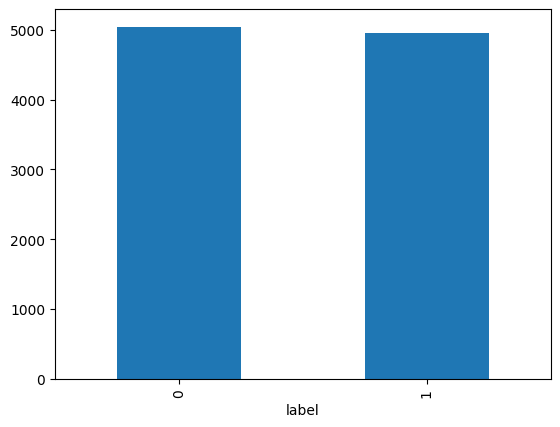

In [7]:
data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

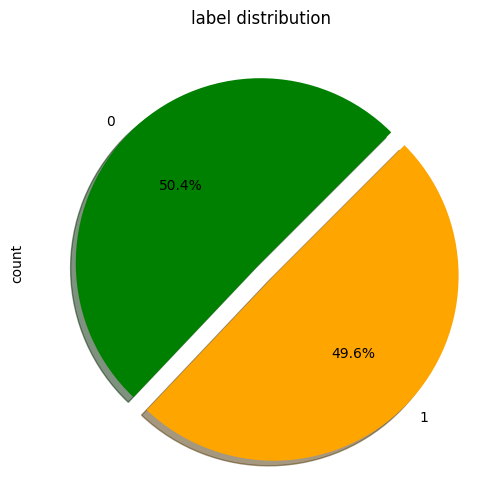

In [8]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

# Working With Text

In [9]:
data['text'][999]

'...but I regret having seen it. Since the ratings on IMDb are relatively high (and they must also have been relatively high on Netflix), I guess I put it in my queue because it is advertised as a gentle comedy from the UK, a category that has produced many films I liked immensely. "Saving Grace," on the other hand, falls into the category of laugh-less comedies usually populated by Hollywood movies produced and directed by the talentless. Brenda Blethyn is a capable actress, and I have liked her in other movies. The concept -- a gardener growing marijuana to overcome the penury she finds herself confronting after her husband\'s death -- does not offend me. Notwithstanding the strenuous efforts on the part of the cast to produce humor, the film falls flat on its face (falling flat on its arse might have been funnier) as far as I and my wife were concerned. Be forewarned, oh gentle reader, not all offbeat British comedies succeed. This one is a dud.'

# Cleaning  steps                                       
removing HTML Tags                                        
extracting emojies    # The pattern re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)') is a regular expression                                                   used to match and extract emojis from a given text.                                                
removing special chars,puntuation,sumbols                                                 
lower casing    
removing stopwords                                
tokenization

In [10]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [11]:
import nltk
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
preprocessing('this is my tags <h1> :) <p>hello world<p> <div> <div> </h2>')

'tag hello world :)'

In [13]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_11808\3423664390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: preprocessing(x))


In [14]:
data['text']

0       grew b 1965 watch love thunderbird mate school...
1       put movi dvd player sat coke chip expect hope ...
2       peopl know particular time past like feel need...
3       even though great interest biblic movi bore de...
4       im die hard dad armi fan noth ever chang got t...
                              ...                        
9995    one cerebr insight movi ever seen script langu...
9996    first movi near complet guess someon actual bo...
9997    said movi cross dress gangster much averag ind...
9998    like adult comedi cartoon like south park near...
9999    well start straighthead present bit dilemma fi...
Name: text, Length: 10000, dtype: object

# Visualizing Negative and Positive Words

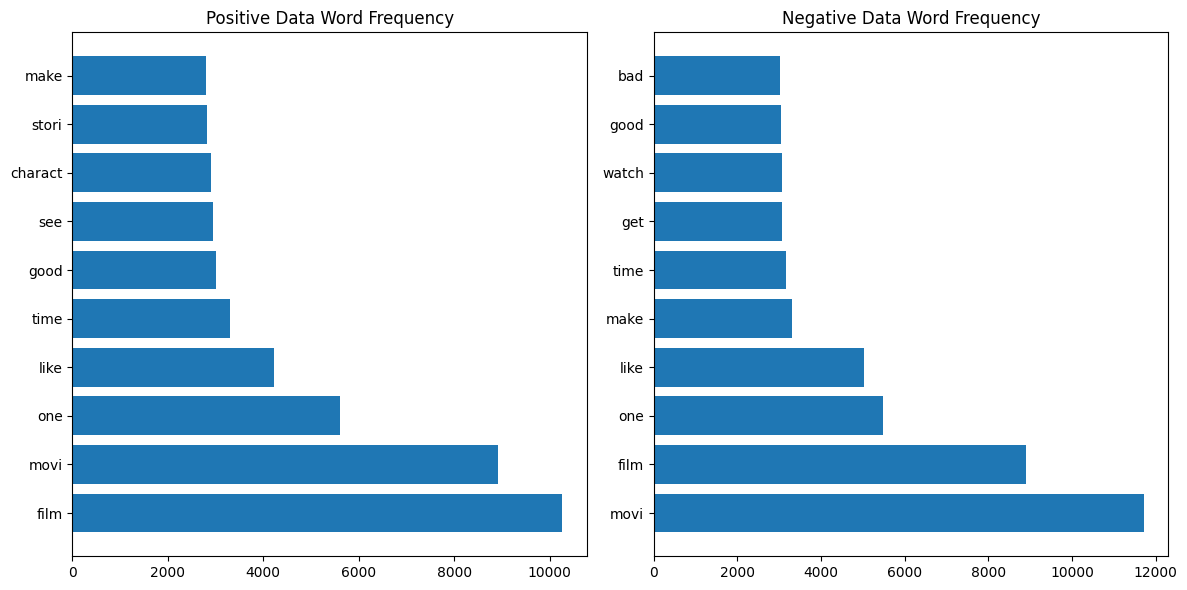

In [15]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

# Training Machine Learning Model for Sentiment Analysis
Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

# Accuracy

In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    #print("Accuracy:", accuracy)
    #print("Precision:", precision)
    #print("Recall:", recall)
    #print("F1 score:", f1)
    
    
    return accuracy, precision, recall, f1

In [20]:
# Example: Random Forest with Bagging
rf = RandomForestClassifier(n_estimators=100)
evaluate_model(rf, X_train, y_train, X_test, y_test)


(0.8306, 0.8312234413422132, 0.8306, 0.8305859124474955)

In [21]:
# Example: AdaBoost
ada = AdaBoostClassifier(n_estimators=100,algorithm='SAMME')
evaluate_model(ada, X_train, y_train, X_test, y_test)


(0.7958, 0.7961720596818279, 0.7958, 0.7956475241655675)

In [22]:
# Example: Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100)
evaluate_model(gb, X_train, y_train, X_test, y_test)

(0.813, 0.8141478680975767, 0.813, 0.8127054789168388)

In [23]:
#VISUALISING perfomance metrics wrt hyperparameters for all models

In [24]:
def plot_performance(param_grid, model, X_train, y_train, X_test, y_test):
    for param_name, param_values in param_grid.items():
        accuracies = []
        precisions = []
        recalls = []
        f1_scores = []

        for param_value in param_values:
            model.set_params(**{param_name: param_value})
            print(f"Evaluating {model.__class__.__name__} with {param_name}={param_value}")
            accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

        plt.figure(figsize=(14, 8))

        plt.subplot(2, 2, 1)
        plt.plot(param_values, accuracies, marker='o')
        plt.title(f'Accuracy vs {param_name} ({model.__class__.__name__})')
        plt.xlabel(param_name)
        plt.ylabel('Accuracy')

        plt.subplot(2, 2, 2)
        plt.plot(param_values, precisions, marker='o')
        plt.title(f'Precision vs {param_name} ({model.__class__.__name__})')
        plt.xlabel(param_name)
        plt.ylabel('Precision')

        plt.subplot(2, 2, 3)
        plt.plot(param_values, recalls, marker='o')
        plt.title(f'Recall vs {param_name} ({model.__class__.__name__})')
        plt.xlabel(param_name)
        plt.ylabel('Recall')

        plt.subplot(2, 2, 4)
        plt.plot(param_values, f1_scores, marker='o')
        plt.title(f'F1-score vs {param_name} ({model.__class__.__name__})')
        plt.xlabel(param_name)
        plt.ylabel('F1-score')

        plt.tight_layout()
        plt.show()



Evaluating RandomForestClassifier with n_estimators=50
Evaluating RandomForestClassifier with n_estimators=100
Evaluating RandomForestClassifier with n_estimators=150
Evaluating RandomForestClassifier with n_estimators=200


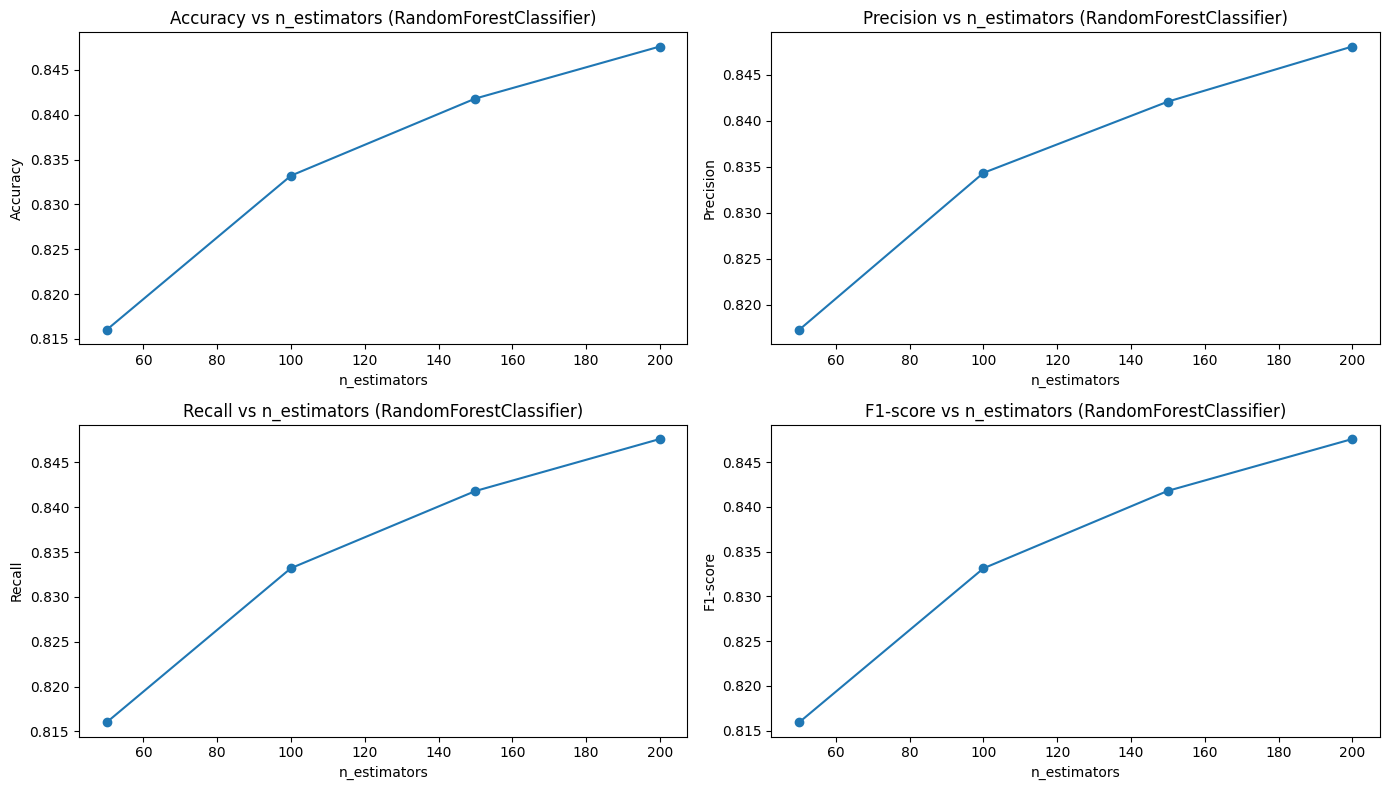

Evaluating RandomForestClassifier with max_depth=None
Evaluating RandomForestClassifier with max_depth=10
Evaluating RandomForestClassifier with max_depth=20
Evaluating RandomForestClassifier with max_depth=30


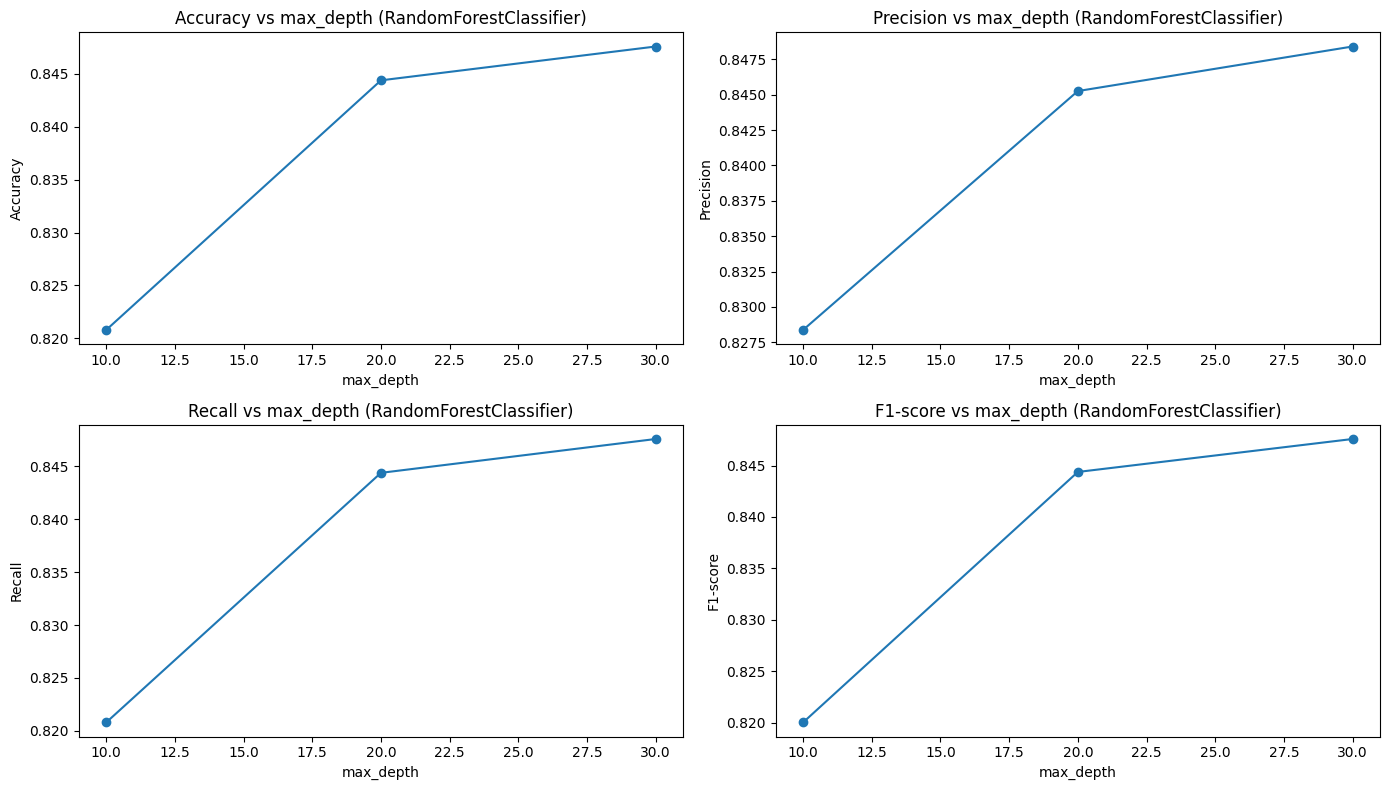

Evaluating RandomForestClassifier with max_features=sqrt
Evaluating RandomForestClassifier with max_features=log2


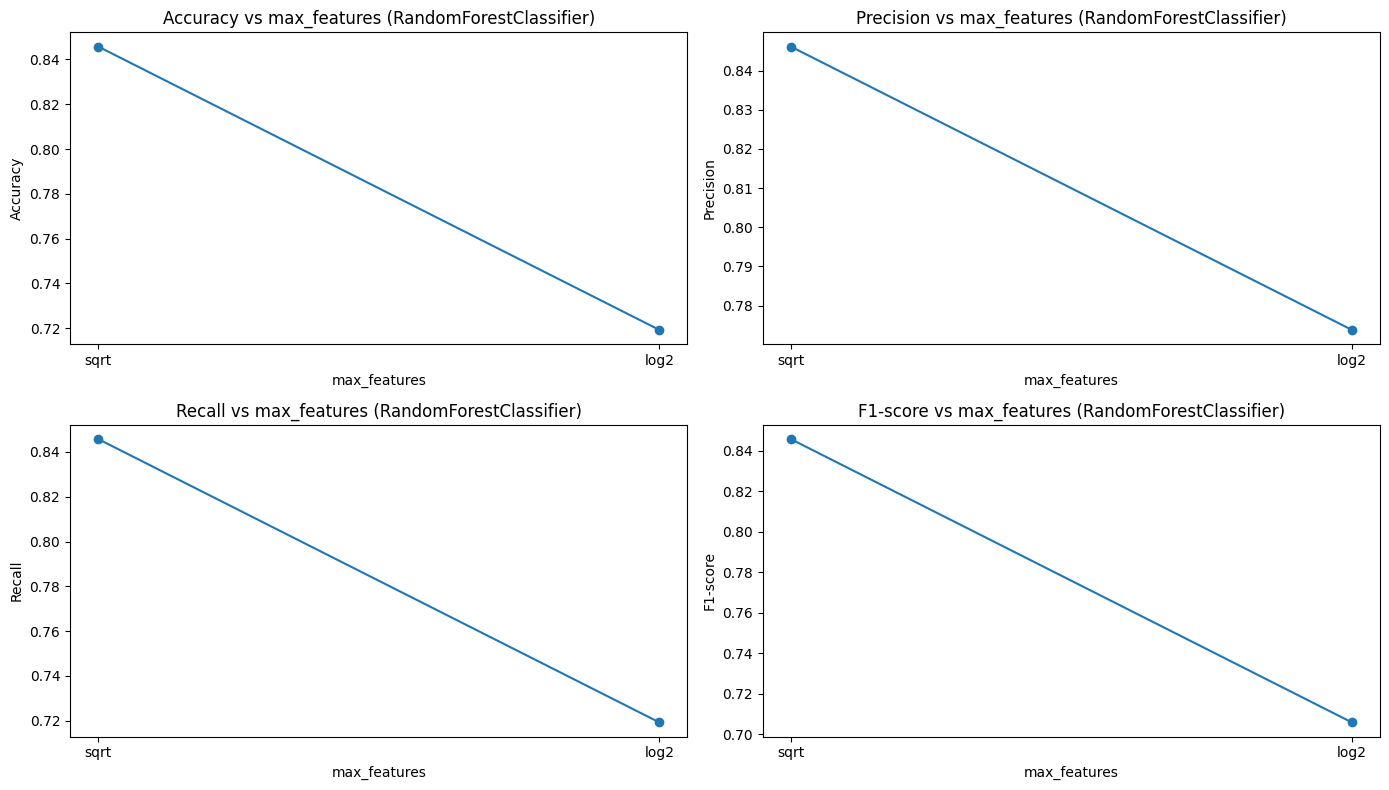

In [25]:
def plot_random_forest_performance(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 10, 20, 30],
        'max_features': ['sqrt', 'log2']
    }
    model = RandomForestClassifier()
    plot_performance(param_grid, model, X_train, y_train, X_test, y_test)

plot_random_forest_performance(X_train, y_train, X_test, y_test)


Evaluating AdaBoostClassifier with n_estimators=50
Evaluating AdaBoostClassifier with n_estimators=100
Evaluating AdaBoostClassifier with n_estimators=150
Evaluating AdaBoostClassifier with n_estimators=200


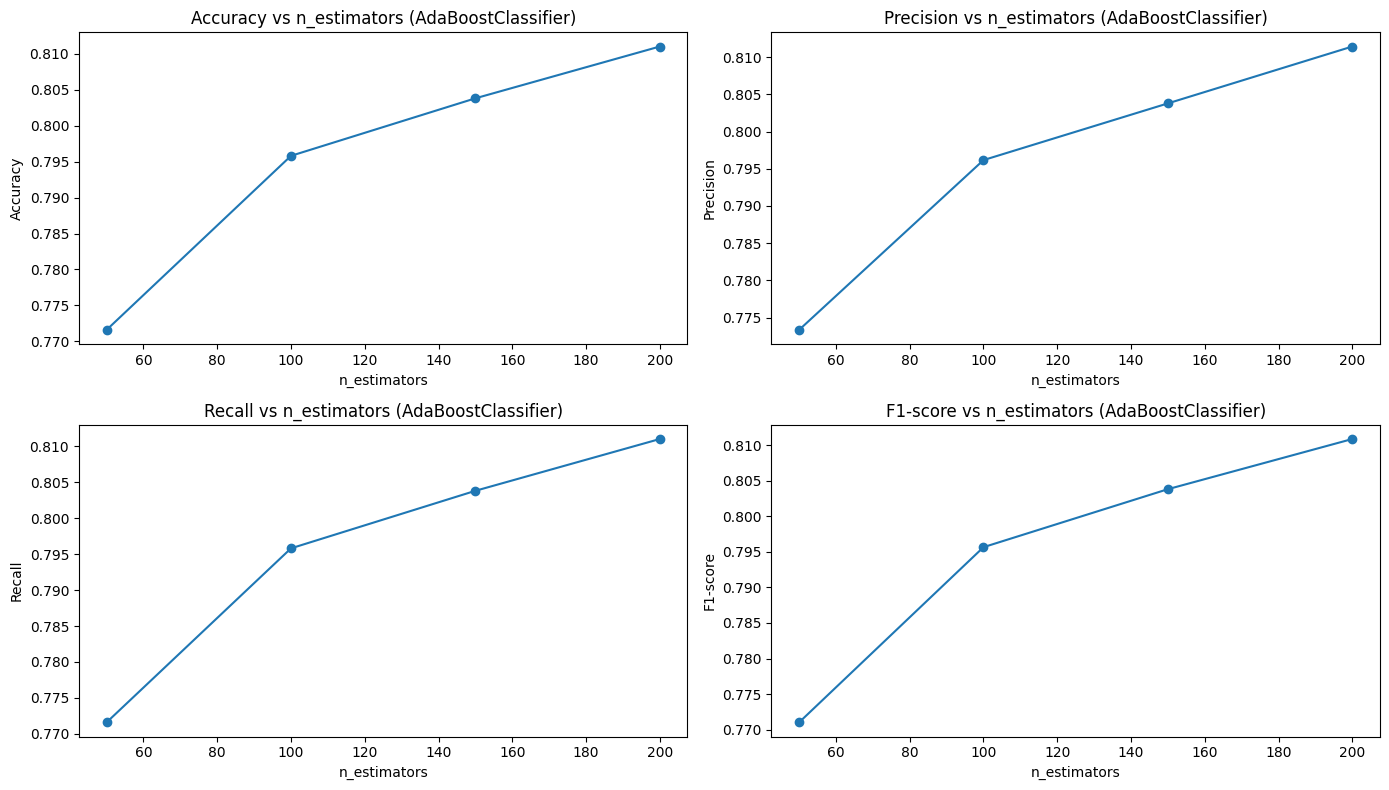

Evaluating AdaBoostClassifier with learning_rate=0.01
Evaluating AdaBoostClassifier with learning_rate=0.1
Evaluating AdaBoostClassifier with learning_rate=0.5
Evaluating AdaBoostClassifier with learning_rate=1


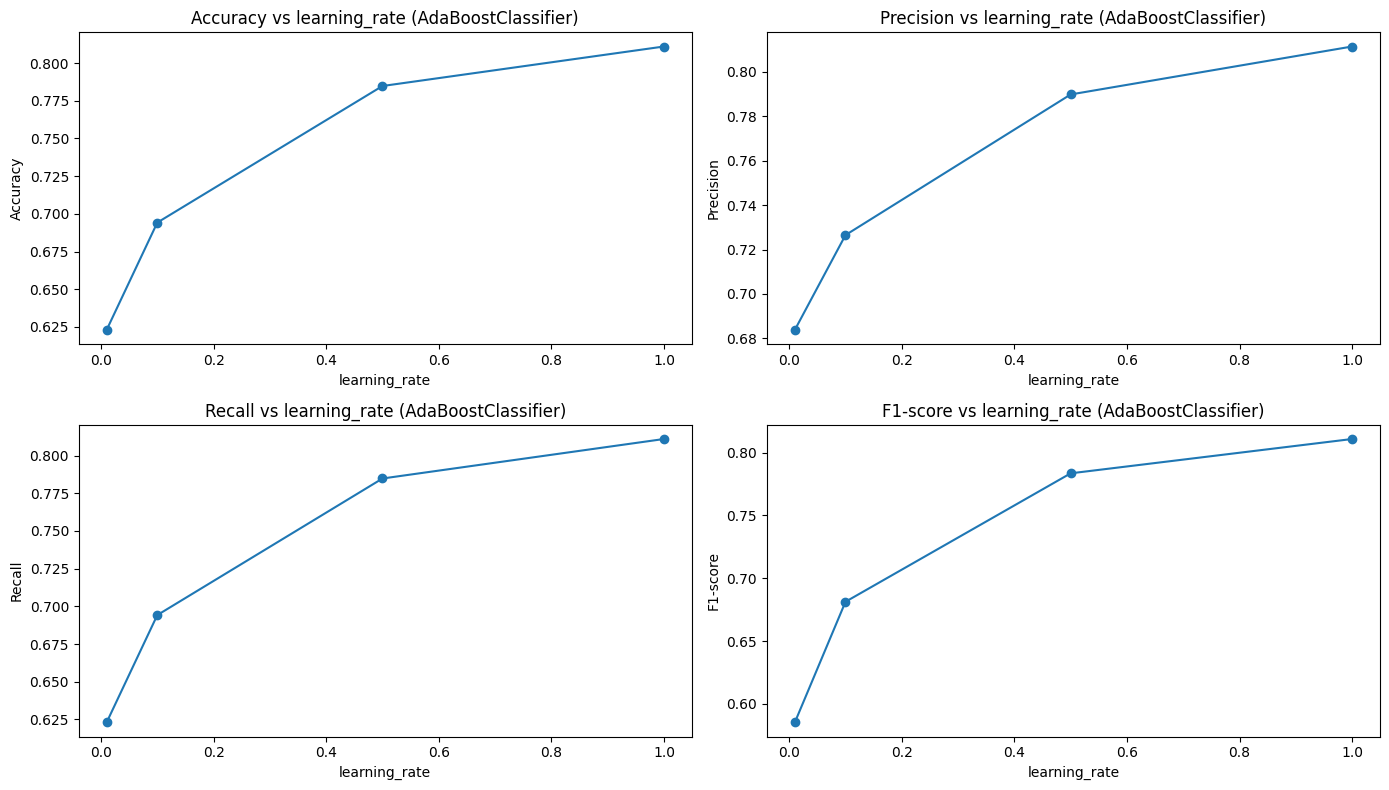

In [25]:
def plot_adaboost_performance(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1]
    }
    model = AdaBoostClassifier(algorithm='SAMME')
    plot_performance(param_grid, model, X_train, y_train, X_test, y_test)

plot_adaboost_performance(X_train, y_train, X_test, y_test)

Evaluating GradientBoostingClassifier with n_estimators=50
Evaluating GradientBoostingClassifier with n_estimators=100
Evaluating GradientBoostingClassifier with n_estimators=150
Evaluating GradientBoostingClassifier with n_estimators=200


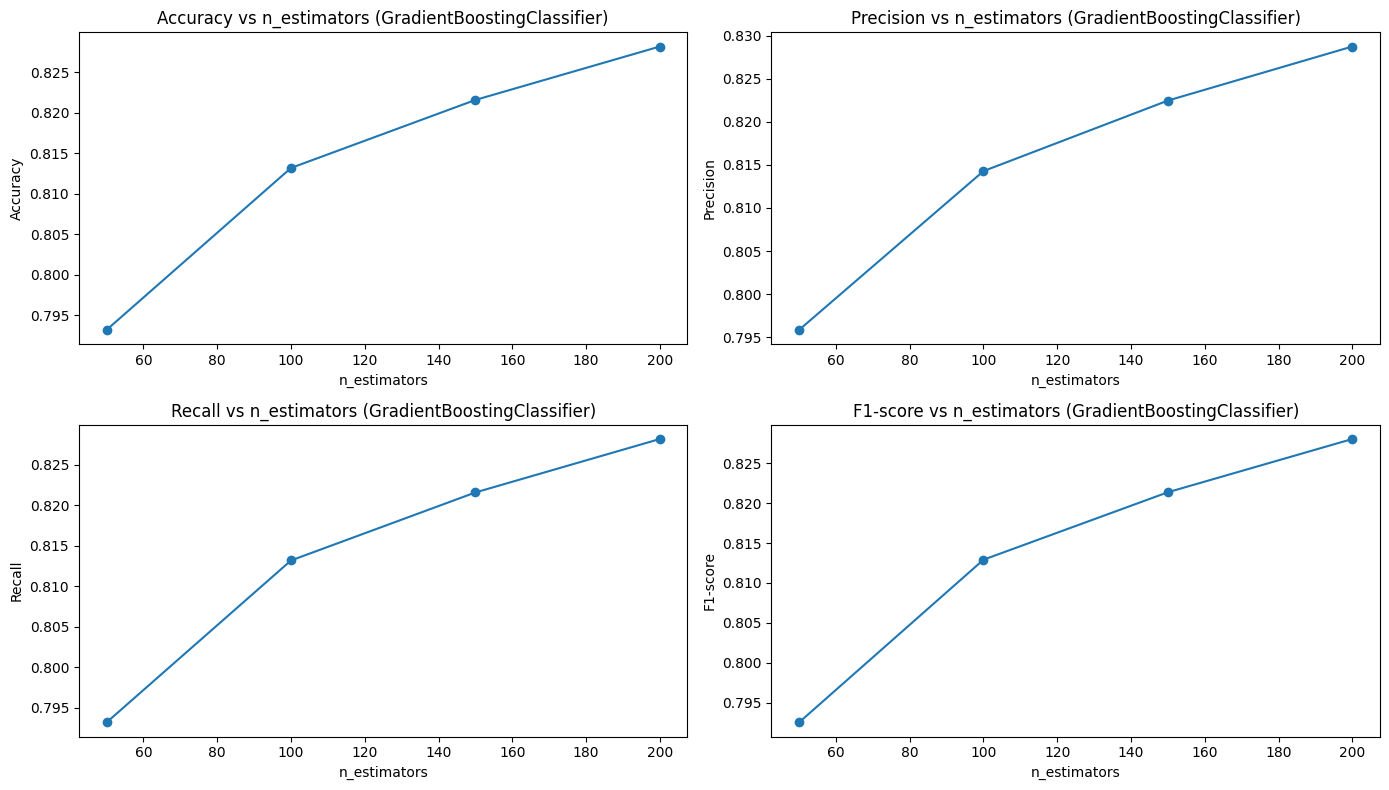

Evaluating GradientBoostingClassifier with learning_rate=0.01
Evaluating GradientBoostingClassifier with learning_rate=0.1
Evaluating GradientBoostingClassifier with learning_rate=0.5
Evaluating GradientBoostingClassifier with learning_rate=1


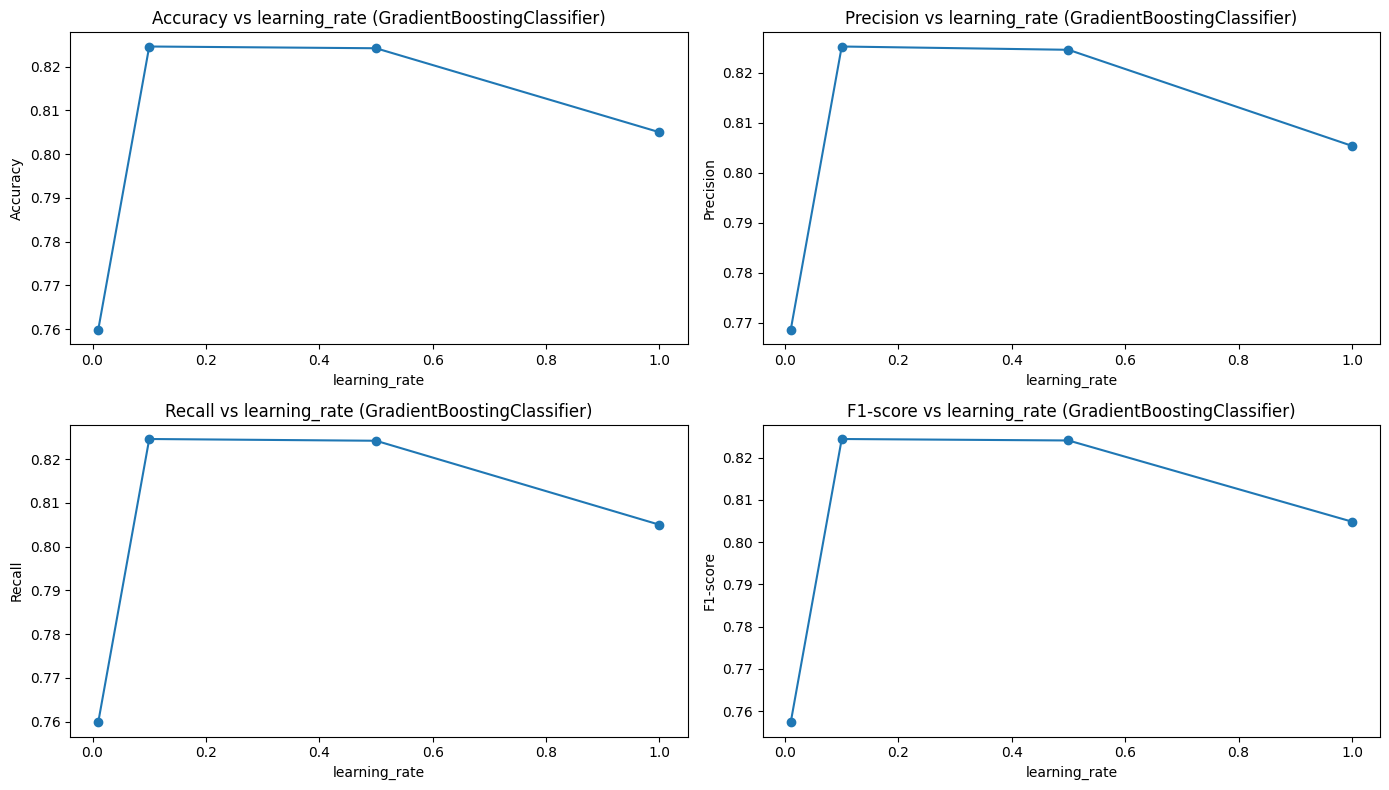

Evaluating GradientBoostingClassifier with max_depth=3
Evaluating GradientBoostingClassifier with max_depth=4
Evaluating GradientBoostingClassifier with max_depth=5
Evaluating GradientBoostingClassifier with max_depth=6


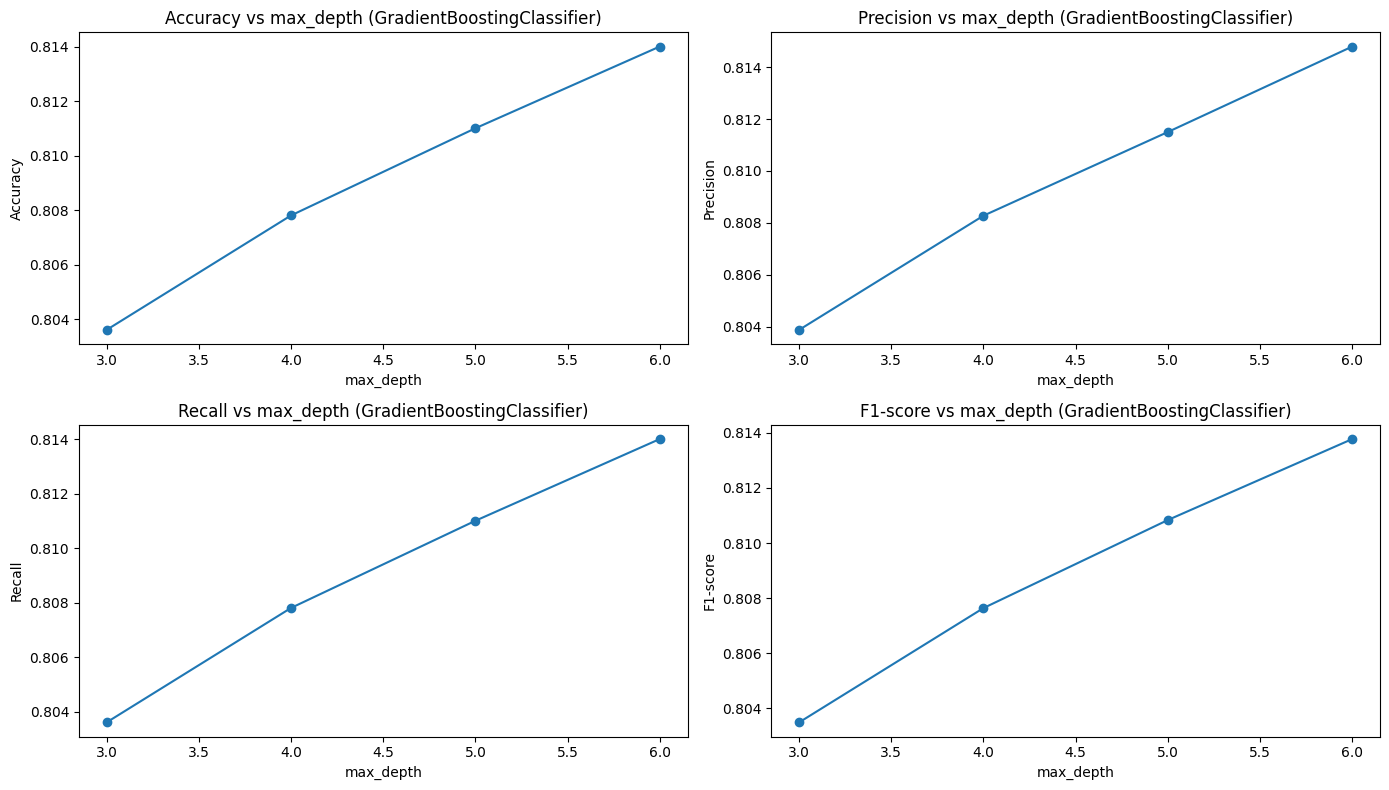

In [44]:
def plot_gradient_boosting_performance(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'max_depth': [3, 4, 5, 6]
    }
    model = GradientBoostingClassifier()
    plot_performance(param_grid, model, X_train, y_train, X_test, y_test)
    
plot_gradient_boosting_performance(X_train, y_train, X_test, y_test)


In [26]:
#HYPERPARAMETER OPTIMIZATION using OPTUNA

In [26]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
   
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        random_state=42
    )
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Create the study and optimize
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=10)

print("Best parameters for RandomForestClassifier: ", study_rf.best_params)


[I 2024-07-24 16:28:42,730] A new study created in memory with name: no-name-de987306-5cfc-423d-b93c-2197ba62e1e9
[I 2024-07-24 16:29:06,554] Trial 0 finished with value: 0.8311976260210142 and parameters: {'n_estimators': 190, 'max_depth': 30, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8311976260210142.
[I 2024-07-24 16:29:10,811] Trial 1 finished with value: 0.8063991043327948 and parameters: {'n_estimators': 105, 'max_depth': 11, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8311976260210142.
[I 2024-07-24 16:29:21,530] Trial 2 finished with value: 0.8169980649728398 and parameters: {'n_estimators': 134, 'max_depth': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8311976260210142.
[I 2024-07-24 16:29:23,522] Trial 3 finished with value: 0.6862010551071057 and parameters: {'n_estimators': 56, 'max_depth': 30, 'max_features': 'log2'}. Best is trial 0 with value: 0.8311976260210142.
[I 2024-07-24 16:29:25,917] Trial 4 finished with value: 0.565599125072

Best parameters for RandomForestClassifier:  {'n_estimators': 190, 'max_depth': 30, 'max_features': 'sqrt'}


In [28]:
from sklearn.ensemble import AdaBoostClassifier
import optuna
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective_ab(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)

    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm='SAMME',
        random_state=42
    )
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Create the study and optimize
study_ab = optuna.create_study(direction='maximize')
study_ab.optimize(objective_ab, n_trials=10)

print("Best parameters for AdaBoostClassifier: ", study_ab.best_params)


[I 2024-07-24 16:59:41,755] A new study created in memory with name: no-name-de288ae1-77e9-482b-b7a0-c3b8a828f083
[I 2024-07-24 17:00:16,956] Trial 0 finished with value: 0.7092013770115124 and parameters: {'n_estimators': 74, 'learning_rate': 0.2696570488604827}. Best is trial 0 with value: 0.7092013770115124.
[I 2024-07-24 17:01:26,841] Trial 1 finished with value: 0.736799218787695 and parameters: {'n_estimators': 143, 'learning_rate': 0.35300709237896577}. Best is trial 1 with value: 0.736799218787695.
[I 2024-07-24 17:02:02,072] Trial 2 finished with value: 0.7215992575794564 and parameters: {'n_estimators': 71, 'learning_rate': 0.4497696338632067}. Best is trial 1 with value: 0.736799218787695.
[I 2024-07-24 17:03:26,255] Trial 3 finished with value: 0.7827973420922058 and parameters: {'n_estimators': 173, 'learning_rate': 0.7107263877587365}. Best is trial 3 with value: 0.7827973420922058.
[I 2024-07-24 17:04:13,943] Trial 4 finished with value: 0.7629972204838745 and parameters

Best parameters for AdaBoostClassifier:  {'n_estimators': 153, 'learning_rate': 0.9703825529002783}


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the objective function
def objective_gb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    max_depth = trial.suggest_int('max_depth', 3, 6)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth
    )
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Create the study and optimize
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=10)

print("Best parameters for GradientBoostingClassifier: ", study_gb.best_params)


[I 2024-07-24 17:13:11,077] A new study created in memory with name: no-name-6fbf406a-2d01-42c2-8826-f22f157507ea
[I 2024-07-24 17:15:51,502] Trial 0 finished with value: 0.8079999846369262 and parameters: {'n_estimators': 183, 'learning_rate': 0.7008316125731144, 'max_depth': 4}. Best is trial 0 with value: 0.8079999846369262.
[I 2024-07-24 17:18:45,069] Trial 1 finished with value: 0.7945994234526443 and parameters: {'n_estimators': 200, 'learning_rate': 0.9981412888938953, 'max_depth': 4}. Best is trial 0 with value: 0.8079999846369262.
[I 2024-07-24 17:21:52,505] Trial 2 finished with value: 0.8166005454371309 and parameters: {'n_estimators': 175, 'learning_rate': 0.32853060031757, 'max_depth': 5}. Best is trial 2 with value: 0.8166005454371309.
[I 2024-07-24 17:24:15,985] Trial 3 finished with value: 0.8130000650530157 and parameters: {'n_estimators': 163, 'learning_rate': 0.6342173662077057, 'max_depth': 4}. Best is trial 2 with value: 0.8166005454371309.
[I 2024-07-24 17:26:08,3

Best parameters for GradientBoostingClassifier:  {'n_estimators': 162, 'learning_rate': 0.268875396254717, 'max_depth': 5}


In [34]:
model_f = RandomForestClassifier(n_estimators= 190, max_depth= 30, max_features= 'sqrt', random_state=42)
model_f.fit(X_train, y_train)

# Evaluate the model
y_pred = model_f.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Performance:
Accuracy: 0.8458
Precision: 0.8464865321016781
Recall: 0.8458
F1 Score: 0.8457841170029251


In [50]:
# Function to predict sentiment for a new review
def predict_sentiment(comment):
    preprocessed_comment=preprocessing(comment)
    comment_list=[preprocessed_comment]
    comment_vector=tfidf.transform(comment_list)
    result = model_f.predict(comment_vector)[0]
    return result

prediction=predict_sentiment('One of childhood favourite movies')
#prediction=predict_sentiment('This movie is a cringefest,a waste of time')


In [51]:
if prediction==1:
    print("Positive Review")
else:
    print("Negative review")

Positive Review
